In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split # 데이터를 학습용과 테스트용으로 나눔
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # 통계 분석을 위한 Python 라이브러리. 주로 회귀 분석, 시계열 분석 등에 사용
from sklearn.metrics import mean_squared_error # MSE

# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X, y = pd.DataFrame(california.data, columns=california.feature_names), california.target


<Axes: ylabel='MedInc'>

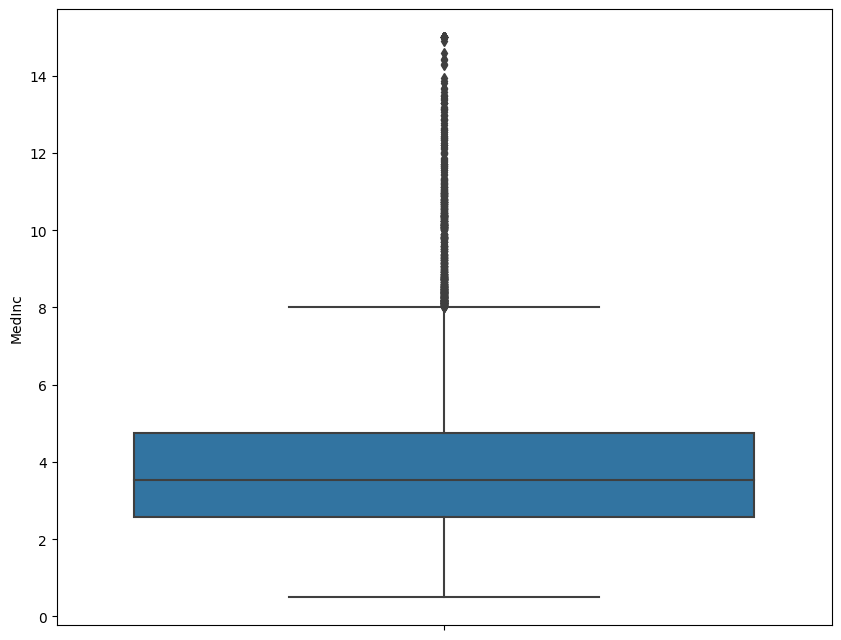

In [ ]:
# 이상치 데이터 확인

plt.figure(figsize=(10,8))
sns.boxplot(y='MedInc',data=X)

In [ ]:
# 소득과 집값을 가지고 간단한 회귀분석 진행해 보자!
# 회귀분석을 통해 -> 성능에 대한 확인을 할 예정
# 이상치를 1번 날리고 -> 2번 날려서 -> 선형적으로 변화하면서 성능이 좋아지는 것

## 이상치를 날리지 않고, 이 부분을 살려서 성능을 개선해 보자!
X_df =X['MedInc']

X_train,X_test,y_train,y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=111)
# random_state=111: 재현 가능한 랜덤 시드 값으로, 동일한 시드를 사용하면 매번 동일한 분할이 생성
# ->코드를 실행할 때마다 다른 결과를 얻지 않고 항상 일관된 결과를 얻을 수 있

In [ ]:
# 단순 선형회귀 학습

lr= LinearRegression(fit_intercept=True)
lr.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [ ]:
# 예측값을 베이스로 확인해 보자!
y_pred1= lr.predict(np.array(X_test).reshape(-1,1))
mse1= mean_squared_error(y_test, y_pred1)

In [ ]:
print('R-square{:.5f}'.format(lr.score(np.array(X_train).reshape(-1,1), y_train)))
print(f'MSE:{mse1}')

R-square0.47520
MSE:0.7144365385330999


(array([ 365., 1882., 3570., 3866., 3484., 2614., 1832., 1158.,  683.,
         377.,  294.,  134.,   72.,  106.,   69.,   24.,   24.,   23.,
           6.,   57.]),
 array([ 0.4999 ,  1.22491,  1.94992,  2.67493,  3.39994,  4.12495,
         4.84996,  5.57497,  6.29998,  7.02499,  7.75   ,  8.47501,
         9.20002,  9.92503, 10.65004, 11.37505, 12.10006, 12.82507,
        13.55008, 14.27509, 15.0001 ]),
 <BarContainer object of 20 artists>)

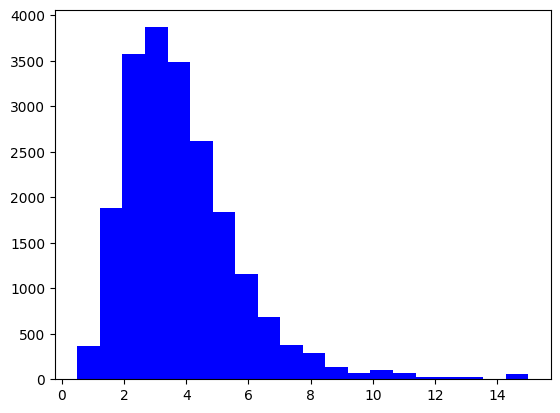

In [ ]:
## 데이터 분포 확인
plt.hist(X['MedInc'],bins=20, color='blue')

# 'MedInc' 열의 값들을 구간(bin)으로 나눔
# bins=20: 히스토그램의 구간(bin) 수를 설정. 여기서는 20개의 구간으로 나눔

<Axes: xlabel='MedInc'>

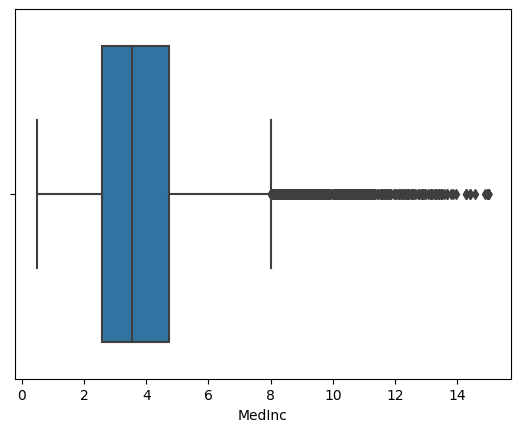

In [ ]:
sns.boxplot(x=X['MedInc'])

In [ ]:
# OLS로 평가

X_const = sm.add_constant(X['MedInc']) #상수항 추가->회귀 모델에 상수항을 포함하여 모델의 적합성을 높이고, 추정된 회귀 계수의 해석을 용이하게 만들기 위함
# 최소제곱법(Ordinary Least Squares, OLS)을 사용하여 선형 회귀 모델을 적합
ml1 = sm.OLS(y, X_const).fit()
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:44   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

### 이상치를 확인하고, 전처리하자!

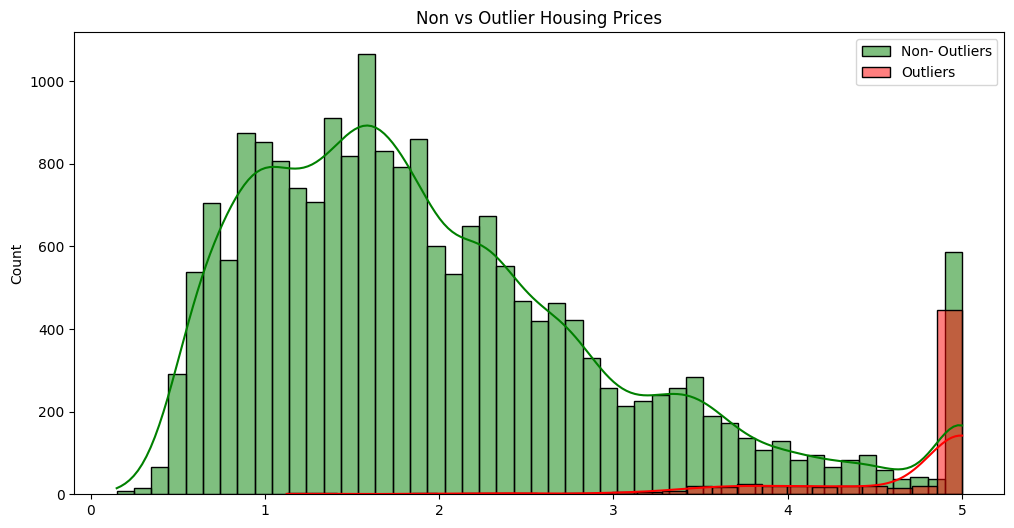

In [ ]:
Q1=X['MedInc'].quantile(0.25)
Q3=X['MedInc'].quantile(0.75)
IQR = Q3- Q1

# IQR 지수로만 만들자!
# 이상치 여부 컬럼
X['Outlier'] = ((X['MedInc'] < (Q1 - 1.5*IQR)) | (X['MedInc'] >(Q3+1.5*IQR)))

# 이상치와 이상치가 아닌 값들의 집값 데이터를 확인
non_outlier_prices = y[X['Outlier']==False]
outlier_prices = y[X['Outlier']==True]

## 시각화를 통해서 이상치들을 비교해 보자!
# Kde=True를 설정하여 밀도 곡선을 함께 그림, 밀도 추정(kernel density estimation, KDE)
# plt.legend(): 범례를 그래프에 표시
plt.figure(figsize=(12,6))
sns.histplot(non_outlier_prices, color='green', kde=True, label='Non- Outliers')
sns.histplot(outlier_prices, color='red', kde=True, label='Outliers')
plt.title('Non vs Outlier Housing Prices')
plt.legend()
plt.show()

In [ ]:
len(non_outlier_prices)

19959

In [ ]:
len(outlier_prices) #이상치 681개 정도

681

- 통계적으로 두 개의 평균이 차이가 유의미한 것인가?

In [ ]:
from scipy import stats

# 이상치와 이상치가 아닌 값들의 집값 데이터
# 두 그룹 간의 평균에 대한 t-통계량과 p-값이 계산
# p-값이 유의수준(alpha)보다 작을 경우 (일반적으로 0.05 또는 0.01), 두 그룹 간의 평균 차이가 통계적으로 유의미하다고 결론
#  독립표본 t-검정을 수행, ttest_ind 함수는 두 독립적인 표본 그룹의 평균을 비교하는 데 사용
# equal_var=False는 등분산성을 가정하지 않음=두 그룹의 분산이 다를 수 있다고 가정
# 등분산성을 가정하는 경우, t-검정의 검정 통계량을 계산할 때 두 그룹의 분산을 통합하여 계산
# 만약 두 그룹의 분산이 다르다면, 이 가정이 위배되어 t-검정의 결과가 왜곡될 수
# 등분산성을 가정하지 않는 경우, Welch의 t-검정(Welch's t-test)이나 등분산성이 없는 독립표본 t-검정이 사용
# equal_var=False를 설정하여 등분산성을 가정하지 않으면 두 그룹의 분산이 다르더라도 적절한 t-검정 방법을 사용하여 검정을 수행
t_stat, p_value = stats.ttest_ind(non_outlier_prices, outlier_prices, equal_var=False )

print(f'T-static : {t_stat}')
print(f'p-value : {p_value}')

# p-value
if p_value <0.05:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.')
else:
    print('이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하지 않다.')

T-static : -96.60151073759215
p-value : 0.0
이상치 있는 집값, 없는 집값 평균차이 통계적으로 유의미하다.


### 회귀분석을 통해 이상치에 대한 파생변수를 만들었을 때 성능 비교

In [ ]:
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X, y = pd.DataFrame(california.data, columns=california.feature_names), california.target

In [ ]:
# 이상치 컬럼 다시 만들기

Q1=X['MedInc'].quantile(0.25)
Q3=X['MedInc'].quantile(0.75)
IQR = Q3- Q1


# IQR 지수로 0,1 이진분류로 이상치에 대해서 좀 더 가중치를 둬서 학습하면 실제 성능이 조금은 올라갈까?
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


# 이상치 파생변수 만들기
X['MedInc_outlier'] = ((X['MedInc']<lower_bound) | (X['MedInc'] > upper_bound)).astype(int)
# .astype(int): 위 조건식의 결과를 정수형(int)으로 변환. 이렇게 하면 이상치를 나타내는 이진 변수가 됨
# 이상치를 나타내는 값은 1이고, 이상치가 아닌 값은 0

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_outlier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0


- 이상치 컬럼을 만들었으니 회귀분석을 통해 성능을 비교해 보자!
- 두 개 컬럼이 들어간다. 다중회귀

In [ ]:
## 이상치를 날리지 않고, 이 부분을 살려서 성능을 개선해 보자!
X_df =X[['MedInc','MedInc_outlier']]

X_train,X_test,y_train,y_test = train_test_split(X_df, y, train_size=0.7, test_size=0.3, random_state=111)

In [ ]:
# 이상치 피처를 넣은 선형회귀 학습

lr1= LinearRegression(fit_intercept=True)
lr1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 이상치 피처를 추가한 예측값을 베이스로 확인해 보자!
y_pred2= lr1.predict(X_test)
mse2= mean_squared_error(y_test, y_pred2)

R-square0.47520
MSE:0.7144365385330999

In [ ]:
print('R-square{:.5f}'.format(lr1.score(X_train, y_train)))
print(f'MSE:{mse2}')

R-square0.47542
MSE:0.7142016307342004


In [ ]:
# OLS로 평가

X_const1 = sm.add_constant(X[['MedInc','MedInc_outlier']]) #상수항 추가

ml2 = sm.OLS(y, X_const1).fit()
print(ml2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9285.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:24:43   Log-Likelihood:                -25619.
No. Observations:               20640   AIC:                         5.124e+04
Df Residuals:                   20637   BIC:                         5.127e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4290      0.015     27.

## 리뷰데이터 전처리 하는 법!
- 다양한 문자열 데이터를 전처리 하는 법

In [ ]:
df = pd.read_csv('movie_rv.csv')

In [ ]:
df_sp=df[:50000]

In [ ]:
df_sp=df_sp.dropna()

In [ ]:
# Sklearn CounterVectorizer는 텍스트 데이터를 단어 또는 n-그램의 등장 빈도 행렬로 변환하는 데 사용
# 이를 통해 텍스트 데이터를 기계 학습 모델에 입력으로 제공할 수, 문서 분류, 감정 분석, 토픽 모델링 등의 작업에 활용
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# 전체 텍스트에서 가장 빈번하게 등장하는 상위 1000개의 단어만 사용하여 CountVectorizer를 구성
# 이 매개변수를 사용하여 텍스트에서 가장 빈번하게 등장하는 단어만 사용하거나, 특정 개수의 단어만 선택할 수 있음
# 이는 피처의 차원을 줄이고 메모리 사용량을 줄이는 데 도움
# re_cv를 사용하여 텍스트 데이터를 벡터 형태로 변환할 수 있음
re_cv = CountVectorizer(max_features=1000)

In [ ]:
df_sp_docu=df_sp['document']

In [ ]:
# 리뷰안에 데이터 넣어서 어떤 식으로 전처리 되는지
re_cnv=re_cv.fit_transform(df_sp_docu)
# fit_transform 메서드는 CountVectorizer를 적합(fit)하고 변환(transform)하는 작업을 동시에 수행
# (fit)텍스트 데이터를 분석하고 단어 사전을 구축한 후, (transfrom)텍스트를 단어 빈도 행렬로 변환

In [ ]:
# 내가 선정한 피처들은 무엇이 있는지?
re_cv.get_feature_names_out()[:100]

array(['0점', '0점은', '10', '10자', '10점', '1점', '1점도', '2점', '3류', '3점',
       '4점', '80년대', '90년대', '9점', 'b급', 'good', 'oo', 'ooo', 'ooo기',
       'ost', 'the', 'tv', 'ㄷㄷ', 'ㅅㅂ', 'ㅇㅇ', 'ㅉㅉ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ',
       'ㅋㅋㅋㅋㅋ', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅜㅜ', 'ㅠㅠ', 'ㅠㅠㅠ', 'ㅡㅡ', '가끔', '가는', '가볍게',
       '가서', '가슴', '가슴이', '가장', '가지고', '가진', '각본', '간만에', '갈수록', '감독',
       '감독님', '감독은', '감독의', '감독이', '감동', '감동과', '감동도', '감동을', '감동이',
       '감동적이고', '감동적인', '감사합니다', '갑자기', '강추', '같네요', '같다', '같습니다', '같아서',
       '같아요', '같은', '같은데', '같음', '같이', '개봉', '개뿔', '개연성', '개인적으로', '거의',
       '건지', '걸작', '겁나', '것도', '것은', '것을', '것이', '것이다', '게다가', '결국', '결말',
       '결말도', '결말은', '결말이', '계속', '공감이', '공포', '공포영화', '과연', '괜찮은', '괜히',
       '굉장히', '구성'], dtype=object)

- 형태소로 나눠서 간단하게 전처리 해보자!

In [ ]:
#konlpy 패키지 사용하시면 됩니다.
from konlpy.tag import Okt
# Okt는 트위터에서 개발한 한국어 형태소 분석기로, 주로 간단한 텍스트 분석 작업에 사용

In [ ]:
# 객체 생성
tw_tag= Okt()

In [ ]:
#형태소로 추출 예정
# df_sp 데이터프레임의 'document' 열에서 3번째 행에 해당하는 텍스트를 형태소 분석하여 명사만 추출
print(tw_tag.nouns(df_sp['document'][2]))

['무재', '밓었', '다그', '래서', '추천']


In [ ]:
# 하나의 토크나이저 함수 만들어서 전체 전처리 해보자!
# 입력으로 받은 한국어 문장을 형태소로 분석하고, 명사와 동사를 추출하여 리스트로 반환하는 함수
def my_token(doc):
    return [token for token, pos in tw_tag.pos(doc) if pos in ['Noun','Verb']]

In [ ]:
# 사이킷런의 countvectorizer 하이퍼파라미터에 그대로 넣으면 된다.

re_cv_mt = CountVectorizer(max_features=1000, tokenizer= my_token)

In [ ]:
# 리뷰안에 데이터 넣어서 어떤 식으로 전처리 되는지
re_cnv_mt=re_cv_mt.fit_transform(df_sp_docu)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 내가 선정한 피처들은 무엇이 있는지?
re_cv_mt.get_feature_names_out()[:100]

array(['가', '가끔', '가는', '가면', '가서', '가슴', '가요', '가장', '가족', '가지', '가진',
       '가치', '각본', '간', '간다', '간만', '갈수록', '감', '감독', '감동', '감명', '감사합니다',
       '감상', '감성', '감정', '갑자기', '강', '강추', '개', '개그', '개봉', '개연', '개인',
       '개판', '거', '거기', '거리', '거의', '거지', '건', '건가', '건지', '걸', '걸까',
       '걸작', '겁나', '것', '게', '게이', '게임', '결론', '결말', '결혼', '경찰', '계속',
       '고', '고민', '고생', '곳', '공감', '공포', '공포영화', '과', '과거', '과연', '과정',
       '관', '관객', '관계', '관람', '관심', '광고', '괴물', '교훈', '구', '구성', '군대',
       '굳이', '굿', '귀신', '그', '그것', '그게', '그냥', '그녀', '그닥', '그대로', '그때',
       '그래픽', '그리', '그린', '그림', '극장', '극장판', '글', '급', '기', '기대', '기도',
       '기본'], dtype=object)

### 코사인 유사도로 계산하여, 유사한 리뷰는 어떤 것인지 확인해 보기!

코사인 유사도(cosine similarity)는 벡터 공간에서 두 벡터 간의 유사성을 측정하는 방법 중 하나. 이는 두 벡터 사이의 각도를 측정하여 유사성을 결정. 코사인 유사도는 -1에서 1까지의 값을 가지며, 값이 1에 가까울수록 두 벡터는 유사하다고 판단

자연어 처리에서 코사인 유사도는 문서 간의 유사성을 측정하는 데 널리 사용. 예를 들어, 문서를 TF-IDF 벡터로 표현한 후, 각 문서 간의 코사인 유사도를 계산하여 문서 간의 유사성을 비교할 수. 이를 통해 검색 엔진이 검색어와 가장 관련성 높은 문서를 찾거나, 문서 간의 토픽 모델링을 수행하는 등의 작업에 활용

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

st = len(df_sp_docu[120])//2

source = df_sp_docu[120][-st:] # 뒷부분을 선택하기 위해 음수 인덱스

In [ ]:
df_sp_docu[120]

'중국인 특유의 과장, 허풍... 있어보이려고 안간힘 쓴 노력은 가상하나, 고증과 현실감 떨어지는 설정이 거북스럽다... 도대체 그들은 왜 이렇게까지 스스로를 과대포장하는 것인지...'

In [ ]:
# 선택한 문장을 CountVectorizer를 사용하여 벡터로 변환. 이를 통해 선택한 문장을 다른 문장들과 비교할 수 있도록 준비
source_rv =re_cv_mt.transform([source])

In [ ]:
source_rv

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
#기준점의 리뷰와 코사인유사도를 계산하자! 선택한 문장과 다른 문장들 간의 코사인 유사도를 계산!
sim_res=cosine_similarity(source_rv,re_cnv_mt)

In [ ]:
len(sim_res[0])

49999

In [ ]:
# 과연 위의 리뷰랑 어떤 리뷰가 가장 유사도가 높을까? 가장 유사한 문장의 인덱스를 출력
print(np.argmax(sim_res[0]))

120


In [ ]:
# 코사인 유사도를 내림차순으로 정렬한 후, 상위 10개의 인덱스를 출력
(-sim_res[0]).argsort()[:10]

array([  120,  9342, 37568, 10881, 36198, 44547, 32319, 10105, 18198,
       19627])

In [ ]:
df_sp_docu[10105]

'도대체 왜 만들었을까? 평점도 왜이리 높은거야?'

In [ ]:
df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
